# Task 1 Notebook for "insert model name here"

## Imports and Setup

**Import the Libararies**

In [2]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

### Connecting to Google Drive

In [3]:

drive.mount('/content/drive')

Mounted at /content/drive


### Reading data set files

In [11]:
bookings_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/bookings_train.csv')
tasks_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/tasks.csv')
staffing_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/staffing_train.csv')

bookings_data.head()

In [12]:
staffing_data.head()

,date,section_id,employees_on_duty,total_task_time_minutes
0,2021-01-01,SEC-001,1,834.569483
1,2021-01-01,SEC-002,4,1525.368990
2,2021-01-01,SEC-003,2,662.095279
3,2021-01-01,SEC-004,4,1499.112620
4,2021-01-01,SEC-005,3,1238.533073


In [10]:
tasks_data.head()

,task_id,task_name,section_id,section_name
0,TASK-001,Register new motor vehicles and issue registra...,SEC-001,Vehicle Registration
1,TASK-002,Process the transfer of vehicle ownership.,SEC-001,Vehicle Registration
2,TASK-003,Conduct theoretical and practical examinations...,SEC-002,Driver Licensing
3,TASK-004,Process the renewal and reissue of driving lic...,SEC-002,Driver Licensing
4,TASK-005,Issue international driving permits.,SEC-002,Driver Licensing


## EDA

### EDA of Bookings data

lets take a look at the columns and some of their values

In [17]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3


In [15]:
bookings_data.describe()

,citizen_id,num_documents,queue_number,satisfaction_rating
count,2.036930e+05,203693.000000,203693.000000,203693.000000
mean,4.996145e+09,2.436790,9.310511,4.187277
std,2.880985e+09,1.734511,8.245711,0.463539
min,4.318100e+04,0.000000,1.000000,3.000000
25%,2.504323e+09,1.000000,3.000000,4.000000
50%,4.995536e+09,2.000000,7.000000,4.000000
75%,7.491514e+09,3.000000,13.000000,4.000000
max,9.999975e+09,14.000000,133.000000,5.000000


removing unnecessary columns. We wont need the num_documents, queue_number and satisfication_rating because these data wont be provided as input from the test datasets. We need the checkin and checkout times because they will be to calculate the actual target value (the thing to be predicted) for task 1.

In [18]:
bookings_data = bookings_data.drop(['num_documents','queue_number','satisfaction_rating'],axis=1)

now lets look at the new table headers again.

In [19]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002


lets get a better idea of how null values have been distributed amoung the columns

In [16]:
bookings_data.isna().sum()

,0
booking_id,0
citizen_id,0
booking_date,0
appointment_date,0
appointment_time,0
check_in_time,6092
check_out_time,6092
task_id,0
num_documents,0
queue_number,0


Now, to see how the null distribution is like task-wise we will plot the following

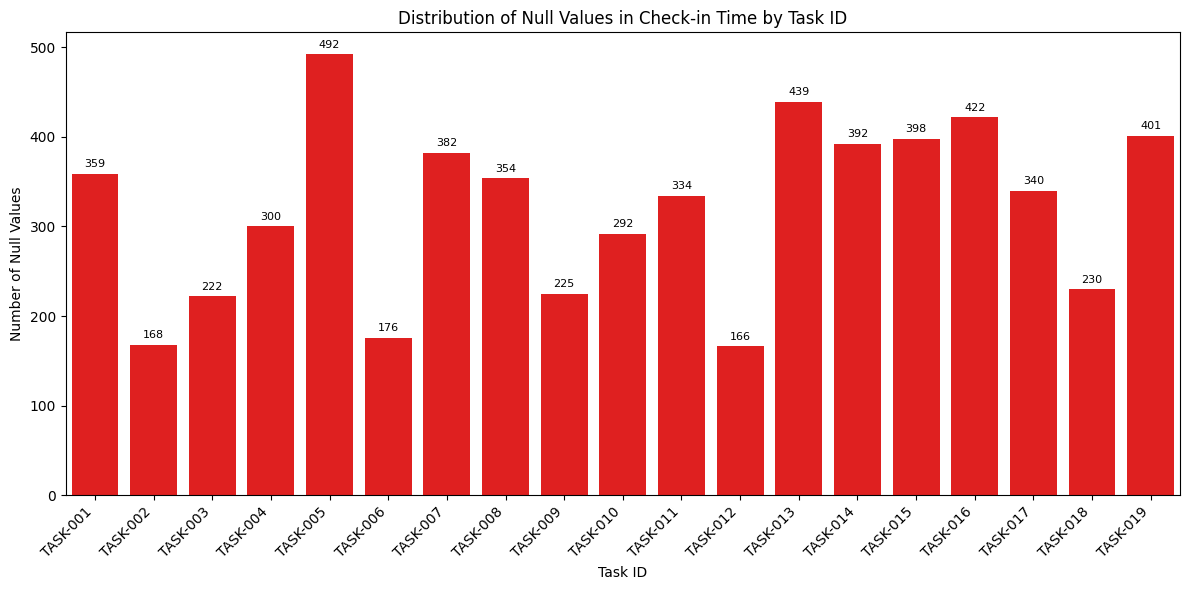

In [24]:
# Group by task_id and count null values in 'check_in_time'
null_counts_by_task = bookings_data.groupby('task_id')['check_in_time'].apply(lambda x: x.isnull().sum())

# Plot the distribution of null values by task_id
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=null_counts_by_task.index, y=null_counts_by_task.values, color='red')
plt.title('Distribution of Null Values in Check-in Time by Task ID')
plt.xlabel('Task ID')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')

# Add the count of null values above each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

now lets see how this looks like when comaparing with the total number of records per task

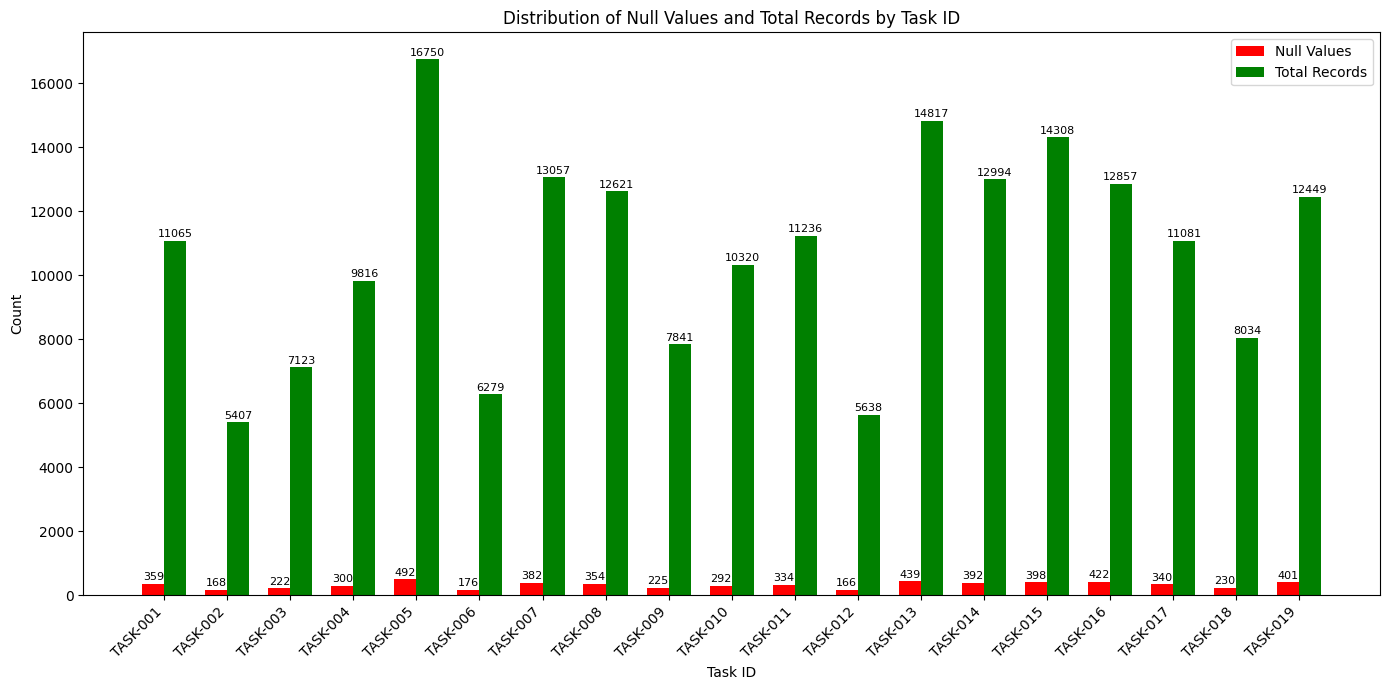

In [23]:
# Group by task_id and count null values in 'check_in_time'
null_counts_by_task = bookings_data.groupby('task_id')['check_in_time'].apply(lambda x: x.isnull().sum())

# Group by task_id and count total records
total_counts_by_task = bookings_data.groupby('task_id').size()

# Combine the data for plotting
combined_counts = pd.DataFrame({
    'Null Values': null_counts_by_task,
    'Total Records': total_counts_by_task
})

# Plot the distribution of null values and total records by task_id
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(combined_counts.index))

bars1 = plt.bar(index, combined_counts['Null Values'], bar_width, label='Null Values', color='red')
bars2 = plt.bar([i + bar_width for i in index], combined_counts['Total Records'], bar_width, label='Total Records', color='green')

plt.xlabel('Task ID')
plt.ylabel('Count')
plt.title('Distribution of Null Values and Total Records by Task ID')
plt.xticks([i + bar_width/2 for i in index], combined_counts.index, rotation=45, ha='right')
plt.legend()

# Add the count of null values above each red bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=8)

# Add the total number of records above each green bar
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Meging datasets into one (TODO)

In [ ]:
sections_data = {
    "Vehicle Registration": [
        "Register new motor vehicles and issue registration numbers.",
        "Process the transfer of vehicle ownership."
    ],
    "Driver Licensing": [
        "Conduct theoretical and practical examinations for new driver's licenses.",
        "Process the renewal and reissue of driving licenses.",
        "Issue international driving permits.",
        "Manage license endorsements for different vehicle classes."
    ],
    "Vehicle Licensing & Revenue": [
        "Issue annual revenue licenses for all types of vehicles.",
        "Collect road taxes and other government levies on vehicles.",
        "Process refunds for overpaid taxes or surrendered licenses."
    ],
    "Technical Inspection & Fitness": [
        "Conduct vehicle inspections for roadworthiness and emissions.",
        "Maintain records of vehicle modifications and certifications.",
        "Issue vehicle fitness certificates (VFC) for commercial vehicles."
    ],
    "Public Information & Services": [
        "Provide access to online services for license and registration checks.",
        "Manage public inquiries and complaints related to traffic regulations.",
        "Publish reports and statistics on vehicle registrations."
    ],
    "Road Safety & Law Enforcement": [
        "Collaborate with law enforcement on vehicle-related legal matters.",
        "Maintain a database of traffic violations and demerit points for drivers.",
        "Develop and implement road safety awareness campaigns.",
        "Manage the suspension and revocation of driving licenses."
    ]
}

In [ ]:
all_task_names = []
all_section_names = []

In [ ]:
for section, tasks in sections_data.items():
    for task in tasks:
        all_task_names.append(task)
        all_section_names.append(section)

In [ ]:
all_task_names

['Register new motor vehicles and issue registration numbers.',
 'Process the transfer of vehicle ownership.',
 "Conduct theoretical and practical examinations for new driver's licenses.",
 'Process the renewal and reissue of driving licenses.',
 'Issue international driving permits.',
 'Manage license endorsements for different vehicle classes.',
 'Issue annual revenue licenses for all types of vehicles.',
 'Collect road taxes and other government levies on vehicles.',
 'Process refunds for overpaid taxes or surrendered licenses.',
 'Conduct vehicle inspections for roadworthiness and emissions.',
 'Maintain records of vehicle modifications and certifications.',
 'Issue vehicle fitness certificates (VFC) for commercial vehicles.',
 'Provide access to online services for license and registration checks.',
 'Manage public inquiries and complaints related to traffic regulations.',
 'Publish reports and statistics on vehicle registrations.',
 'Collaborate with law enforcement on vehicle-re

In [ ]:
all_section_names

['Vehicle Registration',
 'Vehicle Registration',
 'Driver Licensing',
 'Driver Licensing',
 'Driver Licensing',
 'Driver Licensing',
 'Vehicle Licensing & Revenue',
 'Vehicle Licensing & Revenue',
 'Vehicle Licensing & Revenue',
 'Technical Inspection & Fitness',
 'Technical Inspection & Fitness',
 'Technical Inspection & Fitness',
 'Public Information & Services',
 'Public Information & Services',
 'Public Information & Services',
 'Road Safety & Law Enforcement',
 'Road Safety & Law Enforcement',
 'Road Safety & Law Enforcement',
 'Road Safety & Law Enforcement']

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Check if the number of tasks matches the number of rows in the CSV
if len(all_task_names) == len(df):
    # Populate the empty columns
    df['task_name'] = all_task_names
    df['section_name'] = all_section_names

    # --- Step 6: Save the updated DataFrame back to the CSV file ---
    # The `index=False` argument prevents pandas from writing a new index column.
    df.to_csv(csv_file_path, index=False)

    print(f"\nSuccessfully updated '{csv_file_path}' with new data.")
    print("\n--- Updated Data Preview ---")
    print(df.head()) # Display the first 5 rows of the updated file
    print("...")
    print(df.tail()) # Display the last 5 rows

else:
    print(f"Error: The number of tasks ({len(all_task_names)}) does not match the number of rows in the CSV ({len(df)}).")


Successfully updated 'dataset/tasks.csv' with new data.

--- Updated Data Preview ---
    task_id                                          task_name section_id  \
0  TASK-001  Register new motor vehicles and issue registra...    SEC-001   
1  TASK-002         Process the transfer of vehicle ownership.    SEC-001   
2  TASK-003  Conduct theoretical and practical examinations...    SEC-002   
3  TASK-004  Process the renewal and reissue of driving lic...    SEC-002   
4  TASK-005               Issue international driving permits.    SEC-002   

           section_name  
0  Vehicle Registration  
1  Vehicle Registration  
2      Driver Licensing  
3      Driver Licensing  
4      Driver Licensing  
...
     task_id                                          task_name section_id  \
14  TASK-015  Publish reports and statistics on vehicle regi...    SEC-005   
15  TASK-016  Collaborate with law enforcement on vehicle-re...    SEC-006   
16  TASK-017  Maintain a database of traffic violations 